In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

 # EDA (Exploratory Data Analysis)

In [35]:
sal=pd.read_csv("C:\\Users\\Hi\\Desktop\\Python Datasets\\Salary_Data.csv")
sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [36]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Users\Hi\AppData\Local\Temp\ipykernel_14484\3766189827.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sal['Salary'])


<AxesSubplot:xlabel='Salary', ylabel='Density'>

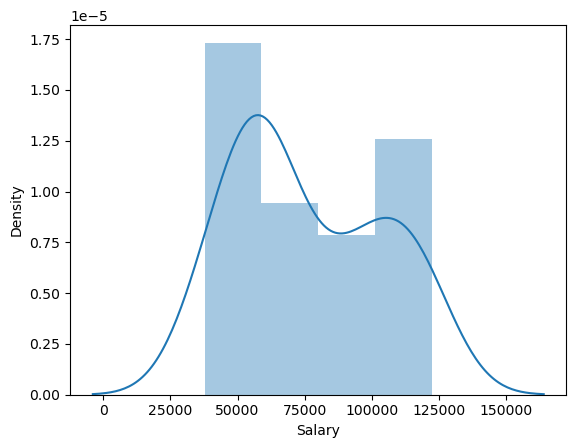

In [37]:
sns.distplot(sal['Salary'])

C:\Users\Hi\AppData\Local\Temp\ipykernel_14484\3561069.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sal['YearsExperience'])


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

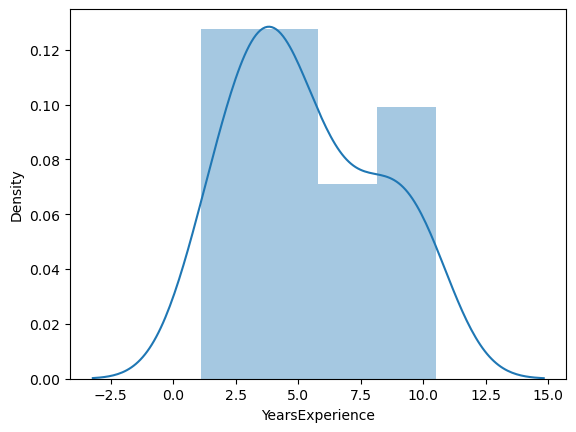

In [38]:
sns.distplot(sal['YearsExperience'])

<AxesSubplot:>

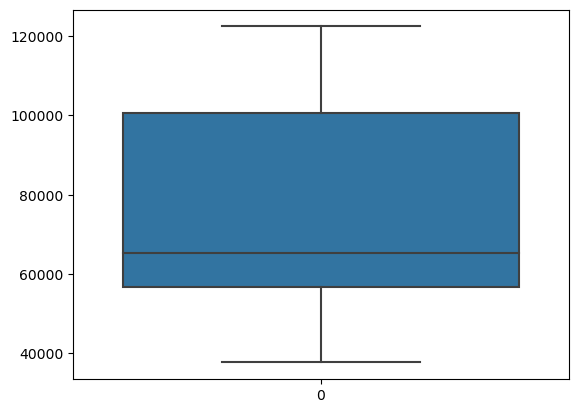

In [39]:
sns.boxplot(sal['Salary'])

<AxesSubplot:>

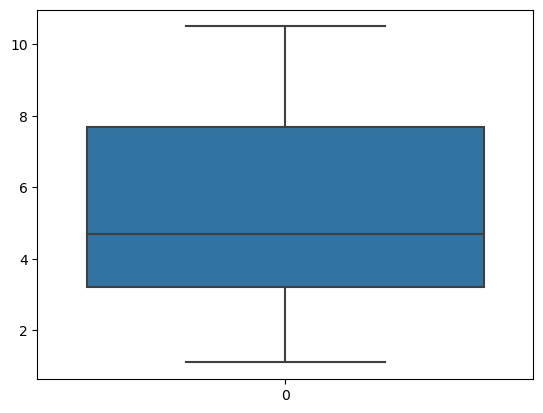

In [40]:
sns.boxplot(sal['YearsExperience'])

In [41]:
sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Checking for Correlation

In [42]:
sal.corr() #there is very high correlation between target variable & Independent Variable

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


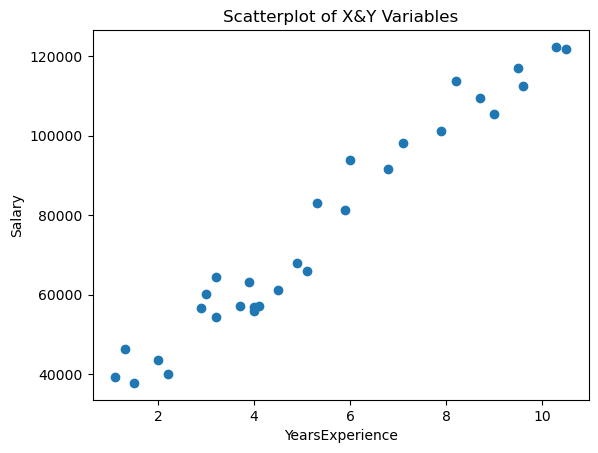

In [43]:
plt.scatter(sal.YearsExperience,sal.Salary)
plt.title('Scatterplot of X&Y Variables')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

# Feature Scaling

In [44]:
#Normalization of Data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
d=scaler.fit_transform(sal)
names=sal.columns
saldf=pd.DataFrame(d,columns=names)
saldf.head()

,YearsExperience,Salary
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514


# Model Creation

In [45]:
model=smf.ols("Salary~YearsExperience",data=saldf).fit()

In [46]:
model.params

Intercept         -0.018236
YearsExperience    1.049252
dtype: float64

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

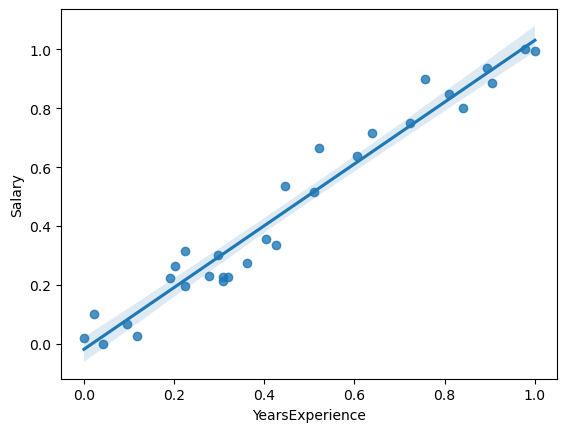

In [47]:
sns.regplot(x="YearsExperience",y="Salary",data=saldf)

In [48]:
model.tvalues,'/n',model.pvalues #pvalue is <0.05 hence rejecting H0 Hypothesis- (there is no dependency btw the variables)& accepting Ha that there is relationship btw the variables

(Intercept          -0.806598
 YearsExperience    24.950094
 dtype: float64,
 '/n',
 Intercept          4.266967e-01
 YearsExperience    1.143068e-20
 dtype: float64)

# Model Validation using R-squared , R- squared adjusted, AIC(Akaike Information Criterion)

In [49]:
model.rsquared,model.rsquared_adj,model.aic

(0.9569566641435086, 0.9554194021486339, -73.90159391406291)

# Residual Plot for Homoscedasticity

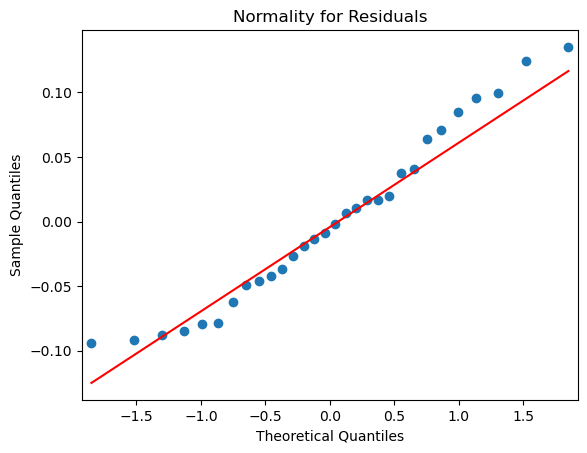

In [50]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normality for Residuals")
plt.show()


In [51]:
list(np.where(model.resid>10))

[array([], dtype=int64)]

# Residual Analysis

In [52]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

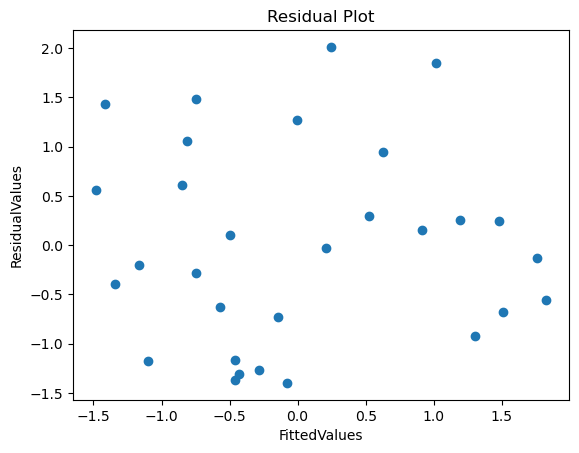

In [53]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title("Residual Plot")
plt.xlabel("FittedValues")
plt.ylabel("ResidualValues")
plt.show() #There are no patterns in Residual vs Fitted Values ,hence No problem orelse we have to transform dataset in log or sigmoid or tanh

# Residuals vs Regressors

eval_env: 1


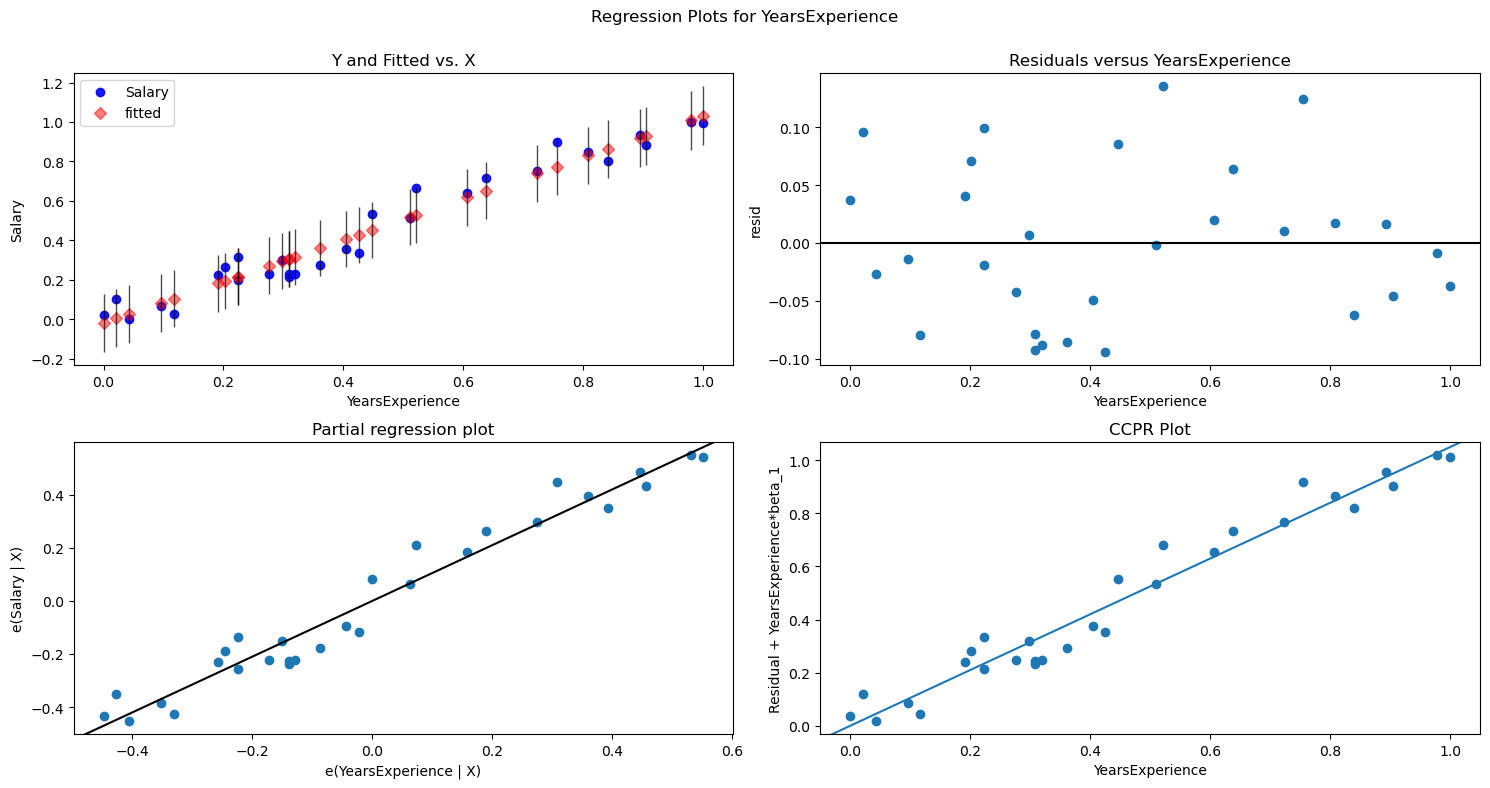

In [54]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"YearsExperience",fig=fig)
plt.show()

# Cook's Distance to Detect High Influencing points & Outliers

In [55]:
model_influence=model.get_influence()
(c, _)= model_influence.cooks_distance
summary_cooks=model_influence.summary_frame()
summary_cooks.head()

,dfb_Intercept,dfb_YearsExperience,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.199964,-0.166721,0.020486,0.577707,0.109342,0.202416,0.570708,0.199964
1,0.511627,-0.420188,0.125146,1.482031,0.102297,0.500291,1.515999,0.511758
2,-0.129931,0.104974,0.008721,-0.406224,0.095595,-0.132069,-0.400085,-0.130073
3,-0.060669,0.046715,0.001931,-0.210257,0.080338,-0.062144,-0.206632,-0.061072
4,-0.340997,0.256662,0.058415,-1.201813,0.074835,-0.341805,-1.211826,-0.344653


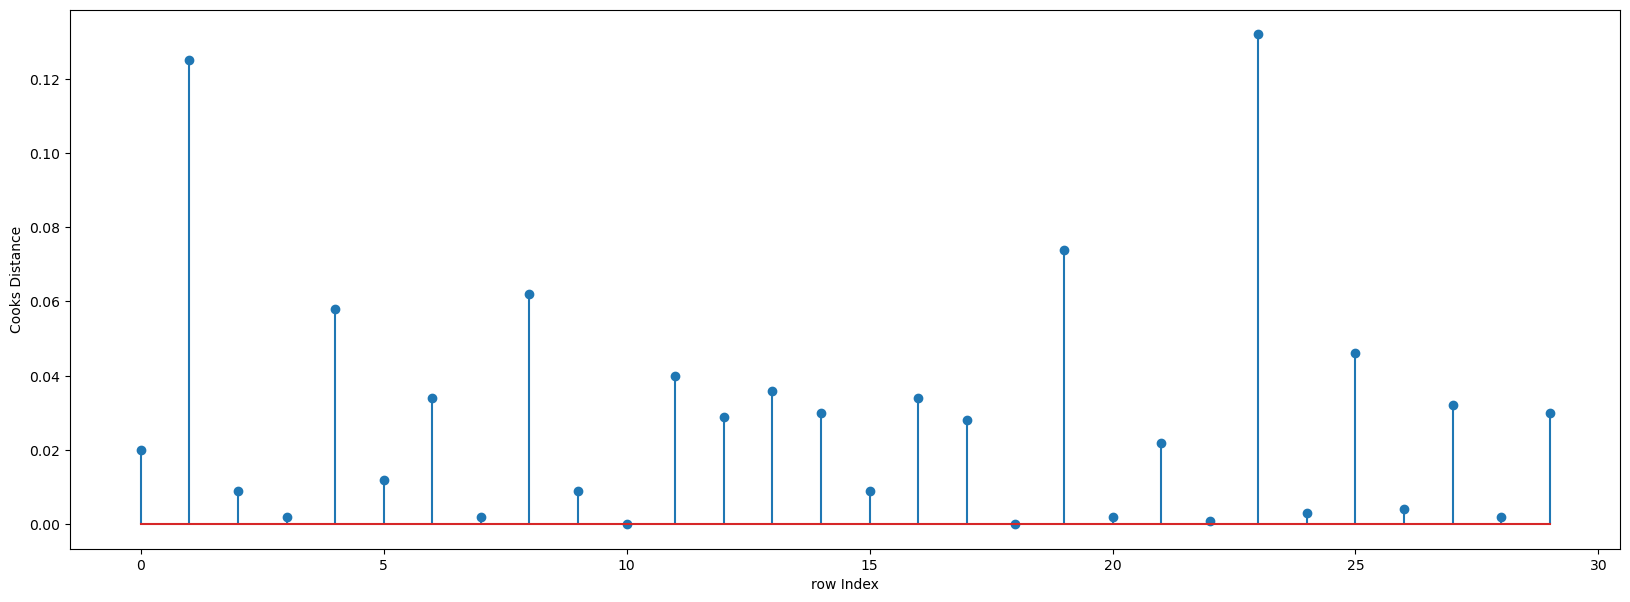

In [56]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(saldf)),np.round(c,3))
plt.xlabel("row Index")
plt.ylabel("Cooks Distance")
plt.show()

In [57]:
(np.argmax(c),np.max(c)) # cooks distance threshold is 4/N so 4/30 = 0.1333 , hence datapoint 23 is indeed influencing point but under the threshold

(23, 0.13175452313135214)

In [58]:
(model.rsquared_adj,model.aic)

(0.9554194021486339, -73.90159391406291)


# Model is ready to predict with 95% accuracy as we got r-squared value as 0.955

from sklearn.model_selection import train_test_split
X=saldf.iloc[:,:-1]
Y=saldf.iloc[:,-1:]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=9)

from sklearn.linear_model import LinearRegression
model2=LinearRegression()
model2.fit(x_train,y_train)


y_pred=model2.predict(x_test)

y_pred